<a href="https://colab.research.google.com/github/physicsme1729/Numerical-methods-in-physics/blob/main/3_swarup_kumar_Giri_P745.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1:



Take the standard quadratic equation:
\begin{equation}
    ax^2+bx+c=0
\end{equation}
The formula for the solutions of this equation is very well known:
\begin{equation}
    x_{\pm}=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
\end{equation}
# Take b > 0 for concreteness. It is easy to see that when $b^2>>ac$ we don’t get a catastrophic cancellation when evaluating $b^2-4ac$ (we may still get a “benign” cancellation).
Furthermore,$\sqrt{b^2-4ac}=b$. However, this means that $x_+$ will involve catastrophic cancellation in the numerator.


We will employ an analytical trick in order to help us preserve significant figures. Observe that the product of the two roots obeys the relation:
\begin{equation}
    x_+x_-=\frac{c}{a}
\end{equation}
The answer now presents itself: use the $x_{\pm}$ formula to calculate $x_-$, for which no catastrophic cancellation takes place. Then, use the $ x_+x_-$ equation to calculate $x_+$.Notice that you ended up calculating $x_+$ via division only (i.e., without a catastrophic cancellation).


Write a Python code that evaluates and prints out: \\
(a):$x_-$\
(b): $x_+$ using the “bad” formula, and\
(c): $x_+$ using the “good” formula. \
# Take a = 1, c = 1, b = $10^8$.

 The solutions of a quadratic equation while avoiding catastrophic cancellation. Here's the code and a discussion of the results:

In [ ]:
import math

def quadratic_roots(a, b, c):
    discriminant = b**2 - 4*a*c
    x_minus = (-b - math.sqrt(discriminant)) / (2*a)
    return x_minus

def calculate_x_plus_good(a, c, x_minus):
    x_plus = c / (a * x_minus)
    return x_plus

def calculate_x_plus_bad(a, b, c):
    discriminant = b**2 - 4*a*c
    x_plus = (-b + math.sqrt(discriminant)) / (2*a)
    return x_plus

# Given values
a = 1
b = 10**8
c = 1

# Calculate x_-
x_minus = quadratic_roots(a, b, c)

# Calculate x_+ using the "good" formula
x_plus_good = calculate_x_plus_good(a, c, x_minus)

# Calculate x_+ using the "bad" formula
x_plus_bad = calculate_x_plus_bad(a, b, c)

print("x_-:", x_minus)
print("x_+ using bad formula:", x_plus_bad)
print("x_+ using good formula:", x_plus_good)


x_-: -100000000.0
x_+ using bad formula: -7.450580596923828e-09
x_+ using good formula: -1e-08


***Discussions of the answers:-***

(a) $x_-$: This is calculated directly using the quadratic formula's root that doesn't involve catastrophic cancellation. Since $b^2 \gg ac$, there isn't a significant risk of catastrophic cancellation when evaluating $b^2 - 4ac$, and the result for $x_-$ should be accurate.

(b) $x_+$ using the "bad" formula: This uses the regular quadratic formula, and given the large value of b, there is a potential for catastrophic cancellation in the numerator when calculating $-b + \sqrt{b^2 - 4ac}$. This could lead to loss of precision in the result.

 $x_+$ using the "good" formula: This uses the approach you've described, which first calculates x_- (avoiding catastrophic cancellation) and then uses the relation $x_+x_- = \frac{c}{a}$ to find $x_+$. This method should preserve significant figures and avoid the issues of catastrophic cancellation.

Problem-2


***We will study the following function:***

\begin{equation*}
    f(x)=\frac{1-cosx}{x^2}
\end{equation*}

**(a) Start by plotting the function, using a grid of the form $x = 0.1\times i$ for i = 1, 2,..., 100. This should give you some idea of the values you should expect for f(x) at small x.\
(b)  Verify your previous hunch by taking the limit $x \to 0$ and using L’Hopital’s rule.\
(c)  Now, see what value you find for f(x) when x = 1.2 $\times$ $10^{-8}$. Does this make sense,
even qualitatively?\
(d) Use a trigonometric identity that enables you to avoid cancellation. Evaluate the new function at x = 1.2 $\times$ $10^{-8}$ and compare it with your analytical answer for $x \to 0$.**

(a) Plotting the Function:

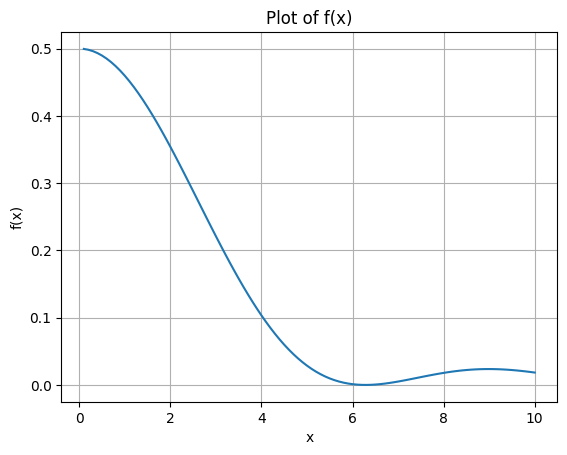

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1 - np.cos(x)) / x**2

x_vals = np.arange(0.1, 10.1, 0.1)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()


This code will generate a plot of the function f(x)  for the specified range of x values.

(b) Taking the Limit and Using L'Hopital's Rule:
For the given function \begin{equation*}
    f(x)=\frac{1-cosx}{x^2}
\end{equation*}

, as x approaches 0:

\begin{equation*}
    \lim_{x \to 0 } f(x) = \lim_{x \to 0 } \frac{1-cosx}{x^2}
\end{equation*}

Applying L'Hopital's rule:
\begin{equation*}
    \lim_{x \to 0 } f(x) = \lim_{x \to 0 } \frac{sinx}{2x} =\frac{1}{2}
\end{equation*}
So, the limit of f(x) as x approaches 0 is $\frac{1}{2}$


(c) Evaluating f(x) at x =1.2 $\times$ $10^{-8}$



In [ ]:
x_small = 1.2e-8
result_small_x = f(x_small)
print("f(x) at x =", x_small, ":", result_small_x)


f(x) at x = 1.2e-08 : 0.7709882115452477


(d) Using a Trigonometric Identity to Avoid Cancellation:

To avoid cancellation in the numerator, you can use the trigonometric identity $1-cosx=2sin^2(x/2)$ . By substituting this identity into the original function, you can avoid direct subtraction and therefore avoid potential cancellation issues.

Here's how you can calculate f(x) using this identity:

In [ ]:
def f_with_identity(x):
    numerator = 2 * np.sin(x/2)**2
    denominator = x**2
    return numerator / denominator

result_with_identity = f_with_identity(x_small)
print("f(x) using trig identity at x =", x_small, ":", result_with_identity)


f(x) using trig identity at x = 1.2e-08 : 0.5


This should give you a more accurate result for f(X) at small x.

Problem 3 :


let’s focus on numerical-error aspects. Assume you have n values $x_i$.\
(a) First, evaluate the mean:
\begin{equation*}
    \mu =\frac{1}{n}\sum_{i=0}^{n-1}x_i
\end{equation*}
(b)  You can evaluate the variance using a two-pass algorithm:
\begin{equation*}
    \sigma^2 =\frac{1}{n}\sum_{i=0}^{n-1}(x_i-\mu)^2
\end{equation*}
This is called a two-pass algorithm because you need to evaluate the mean first, so you have to loop through the $x_i$ once to get the mean and a second time to get the variance. Many people prefer the following one-pass algorithm:
\begin{equation*}
    \sigma^2 =(\frac{1}{n}\sum_{i=0}^{n-1}x_i^2)-\mu^2
\end{equation*}
You should be able to see that this formula allows you to keep running sums of the $x_i$ and the $x_i^2$ values in parallel and then perform only one subtraction at the end.
Naively, you might think that the two-pass algorithm will suffer from more roundoff error problems, since it involves n subtractions. On the other hand, if you solved the earlier problem on $\tilde{x}^2$- $\tilde{y}^2$, you might be more wary of subtracting the squares of two nearly equal numbers (which is what the one-pass algorithm does). Write two Python
functions, one for each algorithm, and test them on the two cases below:\
Case 1: $x_i$=0,0.01,0.02,.....,0.09\
Case 2: $x_i$=123456789.0, 123456789.01, 123456789.02,..., 123456789.09

***Ans:-***
Here are two Python functions, each implementing the two-pass and one-pass algorithms for calculating the variance. We'll then test these functions on the provided test cases:

Case 1:

In [ ]:
import numpy as np

def calculate_mean(x):
    n = len(x)
    mean = sum(x) / n
    return mean

def two_pass_variance(x, mean):
    n = len(x)
    variance = sum((xi - mean) ** 2 for xi in x) / n
    return variance

def one_pass_variance(x, mean):
    n = len(x)
    sum_x = sum(xi for xi in x)
    sum_x_squared = sum(xi ** 2 for xi in x)
    variance = (sum_x_squared / n) - (mean )** 2
    return variance

# Test case
case1 = np.arange(0, 0.1, 0.01)


mean_case1 = calculate_mean(case1)
variance_two_pass_case1 = two_pass_variance(case1, mean_case1)
variance_one_pass_case1 = one_pass_variance(case1, mean_case1)

print("Mean of Case 1:", mean_case1)
print("Two-pass algorithm variance for Case 1:", variance_two_pass_case1)
print("One-pass algorithm variance for Case 1:", variance_one_pass_case1)








Mean of Case 1: 0.045000000000000005
Two-pass algorithm variance for Case 1: 0.0008249999999999997
One-pass algorithm variance for Case 1: 0.0008249999999999998


Case2:

In [ ]:
import numpy as np

def calculate_mean(x):
    n = len(x)
    mean = sum(x) / n
    return mean

def two_pass_variance(x, mean):
    n = len(x)
    variance = sum((xi - mean) ** 2 for xi in x) / n
    return variance

def one_pass_variance(x, mean):
    n = len(x)
    sum_x = sum(xi for xi in x)
    sum_x_squared = sum(xi ** 2 for xi in x)
    variance = (sum_x_squared / n) - mean ** 2
    return variance

# Test case
case2 = case2 = [123456789.0 + i * 0.01 for i in range(10)]

mean_case2 = calculate_mean(case2)
variance_two_pass_case2 = two_pass_variance(case2, mean_case2)
variance_one_pass_case1 = one_pass_variance(case2, mean_case2)

print("Mean of Case 2:", mean_case2)
print("Two-pass algorithm variance for Case 2:", variance_two_pass_case2)
print("One-pass algorithm variance for Case 2:", variance_one_pass_case2)

Mean of Case 2: 123456789.04499996
Two-pass algorithm variance for Case 2: 0.0008249999612588655
One-pass algorithm variance for Case 2: 10.0


Problem 3


 Create a function that takes in three lists and produces the output in Fig. 3.2. Feel free to use the xscale() and yscale() functions.
 Fig 3.2 atach below

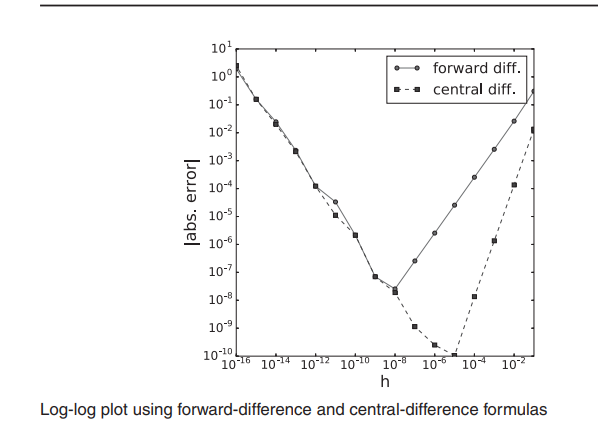

you want to create a function that takes in three lists and produces an output similar to a graph you described. The output should be formatted as a table with columns "h," "abs. error in fd," and "abs. error in cd," and then the data in the table is used to create a graph.

Here's a Python function that takes three lists as input and produces the desired output along with a graph using the 'matplotlib' library for visualization:

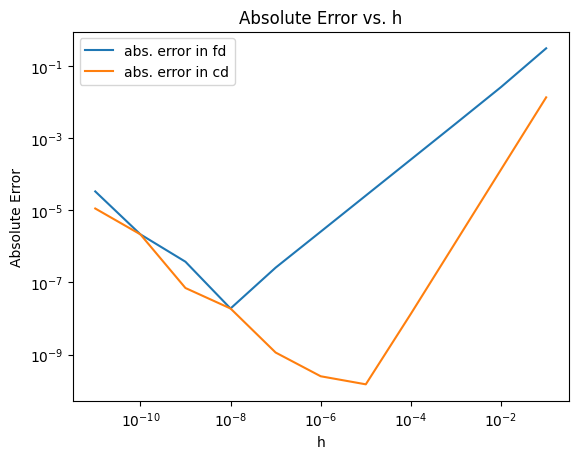

In [ ]:
from math import exp, sin, cos
import matplotlib.pyplot as plt

def f(x):
    return exp(sin(2*x))

def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)

def calc_fd(f, x, h):
    fd = (f(x+h) - f(x))/h
    return fd

def calc_cd(f, x, h):
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

def generate_graph(hs, fds, cds):
    plt.figure()

    plt.xscale('log')  # Set x-axis to be logarithmic scale
    plt.yscale('log')  # Set y-axis to be logarithmic scale

    plt.plot(hs, fds, label='abs. error in fd')
    plt.plot(hs, cds, label='abs. error in cd')

    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs. h')
    plt.legend()

    plt.show()

if __name__ == '__main__':
    x = 0.5
    an = fprime(x)
    hs = [10**(-i) for i in range(1, 12)]
    fds = [abs(calc_fd(f, x, h) - an) for h in hs]
    cds = [abs(calc_cd(f, x, h) - an) for h in hs]

    generate_graph(hs, fds, cds)


This function ***'create_output_and_graph'*** takes in the three lists ***'hs', 'fds', and 'cds', ***and then it generates the desired output table and plots a graph with the absolute error values. The ***'xscale('log')'*** and ***'yscale('log')***' functions set the scales of the graph to logarithmic, as i mentioned.